<a href="https://colab.research.google.com/github/shrikrishnachannawar/Tensorflow_pratice/blob/main/regression_model_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to regression with neural network in Tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

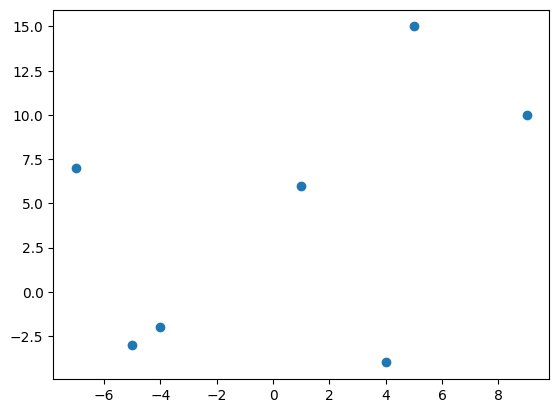

In [ ]:
#create the label
x=np.array([-5.0, -4.0, 1.0, -7.0, 4.0, 5.0, 9.0])
#create the label
y=np.array([-3.0, -2.0, 6.0, 7.0, -4.0, 15.0, 10.0])

# make the graph
plt.scatter(x,y)



In [ ]:
#Take a single example of X
input_shape = x[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape

((), ())

this is because we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In [ ]:
house_info=tf.constant(["bedroom", "bathroom", "hall"])
house_price =tf.constant([985660])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'hall'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([985660], dtype=int32)>)

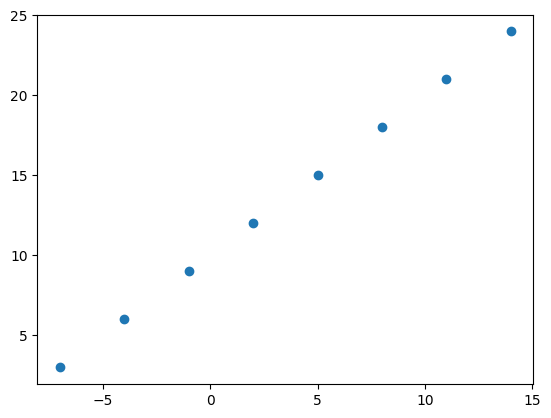

In [ ]:
# Create features (using tensors)
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y);


## Modelling in Tensorflow

Now we are using the 3 fundamental steps to create and training of model in tensoflow.
1. `Creating a model` - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. `Compiling a model` - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. `Fitting a model` - letting the model try to find patterns in the data (how does X get to y).


In [ ]:
#setting the randomm seed
tf.random.set_seed(42)

#createing the model using the sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compiling the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error (mean of the absoulute of the[ y_true - y_Predict])
              optimizer= tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=['mae'])

# fit the model
#model.fit(x,y, epochs=5) we are not using this because the dense layer need the input data in 2 dim and our is in 1D.
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 9.7579 - mae: 9.7579
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 9.6254 - mae: 9.6254
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 9.4929 - mae: 9.4929
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 9.3604 - mae: 9.3604
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 9.2279 - mae: 9.2279


In [ ]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:

# Make a prediction with the model
model.predict(np.array([12.0]).reshape(1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([[14.980002]], dtype=float32)

## Improving a model
so we have todo some changes in our model in three step.

## Modelling in Tensorflow

Now we are using the 3 fundamental steps to create and training of model in tensoflow.
1. `Creating a model` -Here we can change the no of hidden layer  also add neurons and use the different activation function on each layer.
2. `Compiling a model` - we can choose different optimzer functions and ste the learning rate.
3. `Fitting a model` - perhaps we could fit a model for more epochs


In [ ]:
#setting the random seed
tf.random.set_seed(42)

# creatinf  the model
modle =tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

#compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

#fit the model
model.fit(tf.expand_dims(x, axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 9.0954 - mae: 9.0954
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 9.0504 - mae: 9.0504
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 9.0054 - mae: 9.0054
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 8.9604 - mae: 8.9604
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 8.9154 - mae: 8.9154
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 8.8704 - mae: 8.8704
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.8254 - mae: 8.8254
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.7804 - mae: 8.7804
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.7354 - mae: 8.7354
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.6904 - mae: 8.6904
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 8.6454 - mae: 8.6454
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.6004 - mae: 8.6004
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/s

In [ ]:
#setting the random seed
tf.random.set_seed(42)

# creatinf  the model
modle =tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

#compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#fit the model
model.fit(tf.expand_dims(x, axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - loss: 6.7704 - mae: 6.7704
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 6.7648 - mae: 6.7648
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.7591 - mae: 6.7591
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.7535 - mae: 6.7535
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.7479 - mae: 6.7479
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.7423 - mae: 6.7423
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.7366 - mae: 6.7366
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.7310 - mae: 6.7310
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.7254 - mae: 6.7254
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.7198 - mae: 6.7198
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.7141 - mae: 6.7141
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.7085 - mae: 6.7085
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/st

 so above we use the both SGd and Adam optimizer in this problem  the SGD works well as compare to adam. But when we add the learning rate it give good result as comaper to the SGD.

## Evaluating the modle
to evalute the modle we need to visulaize the data
* `The data` - what data are you working with? What does it look like?
* `The model itself` - what does the architecture look like? What are the different shapes?
* `The training of a model`- how does a model perform while it learns?
* `The predictions of a model` - how do the predictions of a model line up against the ground truth (the original labels)?


In [ ]:
#making the bigger dataset
X=np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## splitting the data in train and test set

In [ ]:
len(X)

50

In [ ]:
X_train=X[:40]
y_train=y[:40]

X_test=X[40:]
y_test=y[40:]

In [ ]:
len(X_train), len(X_test)

(40, 10)

## visualizing the data


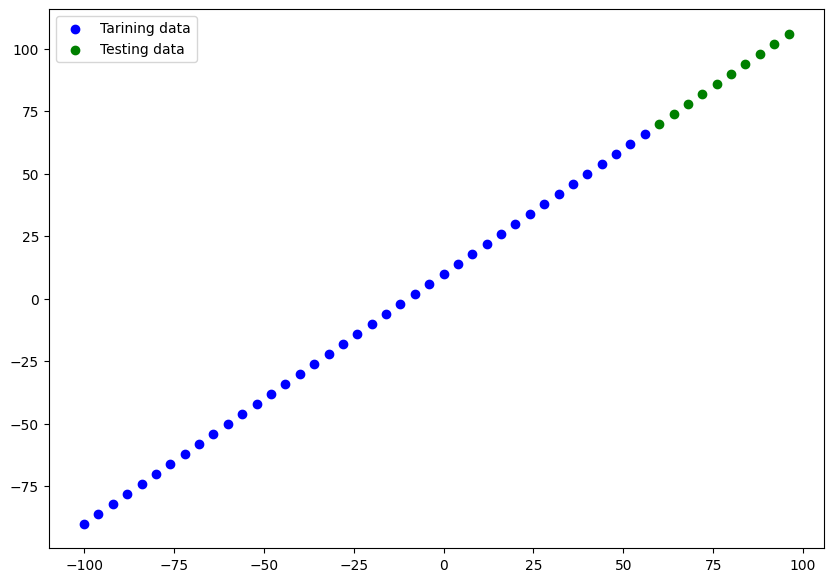

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, c='b', label='Tarining data' )
plt.scatter(X_test, y_test,c='g', label='Testing data')
plt.legend()

In [ ]:
#setting the randomm seed
tf.random.set_seed(42)

#creating the model using the sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation="relu", input_shape=[1]),
    tf.keras.layers.Dense(1)
])

#compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae'])

#fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)
#vversbose decode hoe much getes output

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 200)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 603 (2.36 KB)

 Trainable params: 601 (2.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Visulaize the prediction

In [ ]:
y_preds = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [ ]:
y_preds

array([[ 83.125626],
       [ 88.60271 ],
       [ 94.07972 ],
       [ 99.55665 ],
       [105.03357 ],
       [110.51049 ],
       [115.9874  ],
       [121.464226],
       [126.941   ],
       [132.4178  ]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()
  plt.show()

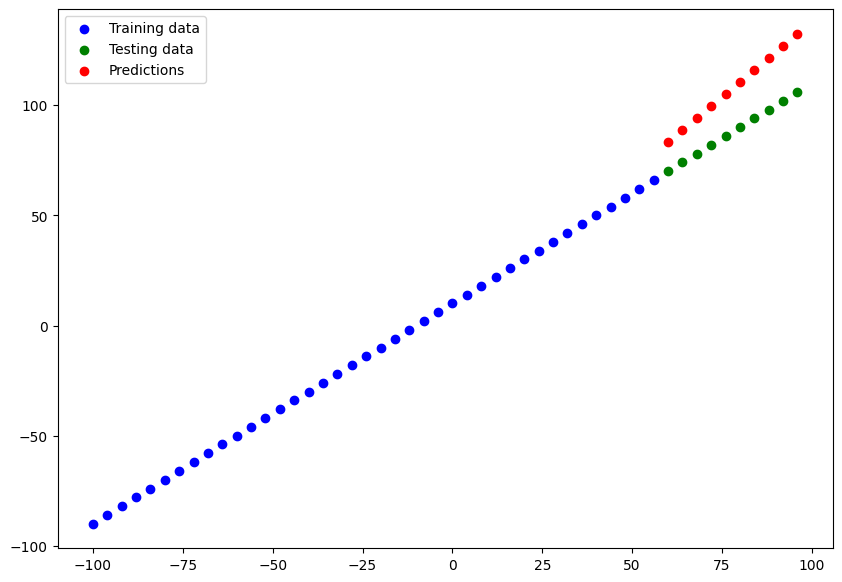

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)


In [ ]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 19.7719 - mae: 19.7719


[19.77191734313965, 19.77191734313965]

In [ ]:
mae = tf.metrics.mae(y_true=y_test,
                    y_pred=y_preds)
mae



<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.125626, 14.602707, 16.07972 , 17.556648, 19.03357 , 20.51049 ,
       21.987396, 23.464226, 24.941002, 26.4178  ], dtype=float32)>

In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
y_preds

array([[ 83.125626],
       [ 88.60271 ],
       [ 94.07972 ],
       [ 99.55665 ],
       [105.03357 ],
       [110.51049 ],
       [115.9874  ],
       [121.464226],
       [126.941   ],
       [132.4178  ]], dtype=float32)

In [ ]:
y_preds.shape, y_test.shape

((10, 1), (10,))

In [ ]:
y_preds.squeeze().shape

(10,)

In [ ]:
mae = tf.metrics.mae(y_true=y_test,
                    y_pred=y_preds.squeeze())
mae



<tf.Tensor: shape=(), dtype=float32, numpy=19.771917>

In [ ]:
#calculate the mse
mse=tf.metrics.mse(y_true=y_test,y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=408.92407>

In [ ]:
def mae(y_test, y_pred):

  return tf.metrics.mae(y_test,y_pred)

def mse(y_test, y_pred):

  return tf.metrics.mse(y_test, y_pred)


## lets start the experimentation

In [ ]:
# model 1
tf.random.set_seed(42)

#creating the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 49.4492 - mae: 49.4492 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.5752 - mae: 16.5752  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.2587 - mae: 10.2587
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8384 - mae: 7.8384  
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.7630 - mae: 10.7630 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6504 - mae: 7.6504 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.9311 - mae: 11.9311
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0192 - mae: 8.0192 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7332 - mae: 9.7332 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0013 - mae: 8.0013 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7216 - mae: 9.7216 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9835 - mae: 7.9835 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


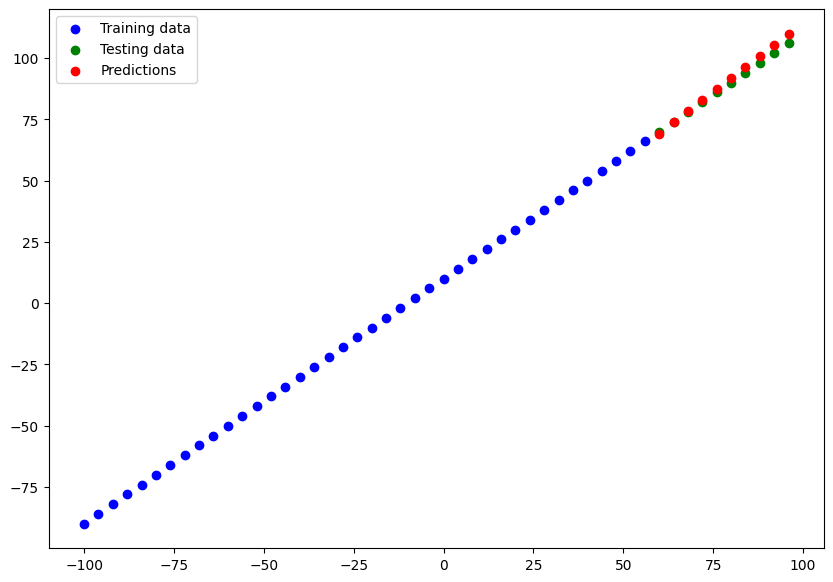

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1



(1.7636582, 4.642127)

In [ ]:
#model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


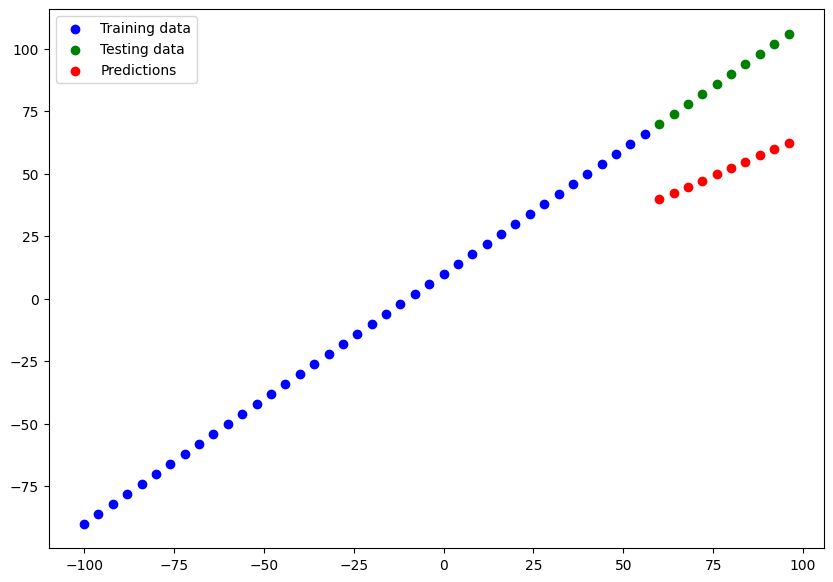

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2


(36.93313, 1382.2346)

In [ ]:
#modle 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


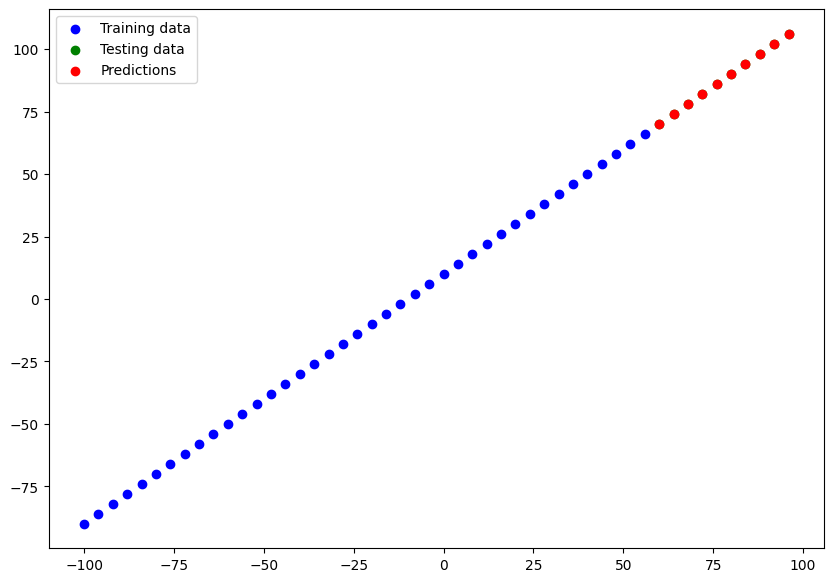

In [ ]:
y_pred_3=model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
mae_3 = mae(y_test, y_pred_3.squeeze()).numpy()
mse_3 = mse(y_test, y_pred_3.squeeze()).numpy()
mae_3, mse_3


(0.1425621, 0.020761054)

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]


In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,1.763658,4.642127
1,model_2,36.933128,1382.234619
2,model_3,0.142562,0.142562


## Saving the model

There are 2 ways to save the model
1. The SaveModel format(default)
2. the HDF5 format

In [ ]:
model_3.save("best_model_HDF5_format.h5")

In [ ]:
!ls best_model_HDF5_format.h5


best_model_HDF5_format.h5


##  Load the model


In [ ]:
loaded_saved_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_saved_model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_3_preds = model_3.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_3_preds.squeeze()).numpy()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


True

In [ ]:
# Download the model or any file from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>